# **6.047 | 6.878 | HST.507**

#**Fall 2022 Problem Set 2: Clustering and Classification**

Due: Wednesday, October 12 at 11:59PM (submit copy of notebook to Stellar)

#Load libraries


In [1]:
from functools import reduce
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

#Naive Bayes Classification

In this problem, we will use a Naive Bayes classifier to label fragments of the genome based on sequence properties.

A) Suppose we want to classify sequence fragments into categories (represented by random variable $Y$): genes, regulatory motifs, or reptitive elements. We want to use the following features: length $X_1$, GC content (proportion of bases which are G or C) $X_2$, and *complexity* $X_3$ (intuitively, what fraction of possible $k$-mers are observed).

Does the naive Bayes assumption hold in this setting? Explain why or why not.

**Answer here:** Naive Bayes assumes that all the features are independent given the class. However, given in Biology the above mentioned features participate in making the class/region functional, it is likely that they are dependent for a given class.  

B) Regardless of whether the naive Bayes assumption holds, we can still build a classifier. (Surprisingly, naive
Bayes classifiers perform well in many applications where this assumption does not hold.) To simplify, we
will discretize each of the features.

Given the training set below, write down the maximum likelihood estimates (recall these are relative frequencies) of each of the conditional probability distributions $P(Xi | Y)$ and the prior probability distribution $P(Y)$.

|GC Content|Length|Complexity|Class|
|---|---|---|---|
|Low|Long|High|Gene|
|Low|Long|Low|Gene|
|High|Long|High|Repeat|
|Medium|Short|High|Motif|
|Medium|Short|Low|Motif|
|High|Long|Low|Repeat|
|High|Short|High|Motif|
|Medium|Long|High|Gene|
|High|Long|Low|Repeat|
|High|Short|High|Motif|

**Answer here:** 
$P(Comp=High|Gene)=\frac{2}{3}$, $P(Comp=Low|Gene)=\frac{1}{3}$, $P(Len=Long|Gene)=1$, $P(Len=Short|Gene)=0$, $P(GC-Con=High|Gene)=0$, $P(GC-Con=Medium|Gene)=\frac{1}{3}$, $P(GC-Con=Low|Gene)=\frac{2}{3}$

$P(Comp=High|Repeat)=\frac{1}{3}$, $P(Comp=Low|Repeat)=\frac{2}{3}$, $P(Len=Long|Repeat)=1$, $P(Len=Short|Repeat)=0$, $P(GC-Con=High|Gene)=1$, $P(GC-Con=Medium|Repeat)=0$, $P(GC-Con=Low|Repeat)=0$


$P(Comp=High|Motif)=\frac{3}{4}$, $P(Comp=Low|Motif)=\frac{1}{4}$, $P(Len=Long|Motif)=0$, $P(Len=Short|Motif)=1$, $P(GC-Con=High|Motif)=\frac{1}{2}$, $P(GC-Con=Medium|Motif)=\frac{1}{2}$, $P(GC-Con=Low|Motif)=0$


$P(Gene)=\frac{3}{10}$,
$P(Repeat)=\frac{3}{10}$,
$P(Motif)=\frac{4}{10}$


C) Given the model, compute the maximum a posteriori estimate of the class of the new observation below. (Hint: Is it necessary to compute the denominator in Bayes Theorem?)

|GC Content|Length|Complexity|
|---|---|---|
|Medium|Long|Low|

**Answer here:** $P(Gene|Comp=Low, Len=Long, GC-Con=Medium)=$  
$P(Gene|Comp=Low)\cdot P(Gene|Len=Long) \cdot P(Gene|GC-con=Medium)\times \frac{1}{P(denominator)}=$ 
$P(Comp=Low|Gene)\times P(Gene) \cdot P(Comp=Low|Gene) \times P(Gene) \cdot P(GC-con=Medium|Gene) \times P(Gene) \times \frac{1}{P(denominator)}=$ $\frac{1}{3}\times 1 \times \frac{1}{3} \times (\frac{3}{10})^3=$ $\frac{3}{1000} \times \frac{1}{P(denominator)}$ 


$P(Repeat|Comp=Low, Len=Long, GC-Con=Medium)=$  
$P(Repeat|Comp=Low)\cdot P(Repeat|Len=Long) \cdot P(Repeat|GC-con=Medium)\times \frac{1}{P(denominator)}=$ 
$P(Comp=Low|Repeat)\times P(Repeat) \cdot P(Comp=Low|Repeat) \times P(Repeat) \cdot P(GC-con=Medium|Repeat) \times P(Repeat) \times \frac{1}{P(denominator)}= 0$

$P(Motif|Comp=Low, Len=Long, GC-Con=Medium)=$  
$P(RepeatMotif|Comp=Low)\cdot P(Motif|Len=Long) \cdot P(Motif|GC-con=Medium)\times \frac{1}{P(denominator)}=$ 
$P(Comp=Low|Motif)\times P(Motif) \cdot P(Comp=Low|Motif) \times P(Motif) \cdot P(GC-con=Medium|Motif) \times P(Motif) \times \frac{1}{P(denominator)}= 0$

The fragment with the above mentioned features belongs to gene. 

#Classification of conserved regions

In this problem, we will use simulation to study the problem of classifying conserved sequence fragments given
multiple alignments of four species.

A) To simplify our classification problem, we will consider alignment scores at each position. We define the alignment score of a column of a multiple alignment to be the number of unique pairs that share the same symbol. An example multiple alignment and the score for each column is given below:

```
GACTA
TACTA
AGTTA
CTTAA
-----
01236
```

Consider two models $C$ for conserved regions and $N$ for unconserved regions. Assuming the alignment score
at every position is independent, the conditional probability of observing a particular score in a column given
each model is tabulated below:

|Score|$C$|$N$|
|---|---|---|
|0|0.05|0.1|
|1|0.15|0.35|
|2|0.2|0.25|
|3|0.3|0.2|
|6|0.3|0.1|

Compute the conditional probabilities of observing each of the following alignments given each of the models:

```
A1

ACGACGACTA
CAGACGCTGA
TTCCTCTGAT
AGATGTGACT
----------
1011110002
```
```
A2

ACAACGAGTA
AAAACGAATA
TCATCGAGTT
ACATCTAACT
----------
3362636232
```

You may perform your computations using the following code block or manually. However, if you choose to perform your computations manually, please show work (write out the entire expression).

In [ ]:
# Conditional probabilities of alignment score for each model
#       0     1     2    3    6
C = [0.05, 0.15,  0.2, 0.3, 0.3]
N = [ 0.1, 0.35, 0.25, 0.2, 0.1]

# Calculate the conditional probability of observing the sequence of alignment scores given a model (C or N)
def calc_cond_prob(model, align_scores):
    return np.multiply.reduce([model[score] for score in align_scores])

A1_score=[1,0,1,1,1,1,0,0,0,2]
prob_A1C=calc_cond_prob(C,A1_score)
prob_A1N=calc_cond_prob(N,A1_score)
print('P(A1score|C)=' , prob_A1C)
print('P(A1score|N)=', prob_A1N)

A2_score=[3,3,4,2,4,3,4,2,3,2] #all the 6 are replaced with 4
prob_A2C=calc_cond_prob(C,A2_score)
prob_A2N=calc_cond_prob(N,A2_score)
print('P(A2score|C)=' , prob_A2C)
print('P(A2score|N)=', prob_A2N)



P(A1score|C)= 9.4921875e-11
P(A1score|N)= 1.313046875e-07
P(A2score|C)= 1.7496000000000002e-06
P(A2score|N)= 2.5000000000000012e-08


**Answer here:**

$P(A1score|C)= 9.4921875e-11$

$P(A1score|N)= 1.313046875e-07$

$P(A2score|C)= 1.7496000000000002e-06$

$P(A2score|N)= 2.5000000000000012e-08$

In the next two parts, you will simulate alignments and compare conditional probabilities between $C$ and $N$. You may find the functions in the following code block to be helpful.

In [ ]:
# Conditional probabilities of alignment score for each model
#       0     1     2    3    6
C = [0.05, 0.15,  0.2, 0.3, 0.3]
N = [ 0.1, 0.35, 0.25, 0.2, 0.1]

# Generate a n-length sequence of alignment scores given a model (C or N)
def gen_align_scores(model, n):
    return np.random.choice(range(5), size = n, p = model)

# Calculate the conditional probability of observing the sequence of alignment scores given a model (C or N)
def calc_cond_prob(model, align_scores):
    return np.multiply.reduce([model[score] for score in align_scores])



B) Use the following code block to simulate 10,000 sequences $S$ of alignment scores of length 10 from $N$. Approximately how often is $P(S|C) > P(S|N)$?

In [ ]:

# Conditional probabilities of alignment score for each model
#       0     1     2    3    6
C1 = [0.005, 0.095, 0.1, 0.3, 0.5]
N1 = [ 0.4, 0.3, 0.1, 0.15, 0.05]

#       0     1     2    3    6
C2 = [0.2, 0.2, 0.2, 0.2, 0.2]
N2 = [0.2, 0.2, 0.2, 0.2, 0.2]


counter=0
#counter2=0
for i in range(10000):
  score=gen_align_scores(N,10)
  prob_SC=calc_cond_prob(C, score)
  prob_SN=calc_cond_prob(N, score)
  #counter2 += 1

  if prob_SC>prob_SN:
    counter+=1

print("Out of 10000 times, number of times P(S|C)>P(S|N)=", counter)
#print(counter2)



Out of 10000 times, number of times P(S|C)>P(S|N)= 1245


**Answer here:**

Out of 10000 times, number of times P(S|C)>P(S|N)= 1284

C) Use the following code block to simulate 10,000 sequences $S$ of alignment scores of length 10 from $C$. Approximately how often is $P(S|N) > P(S|C)$?

In [ ]:
counter=0
for i in range(10000):
  score=gen_align_scores(C,10)
  prob_SC=calc_cond_prob(C, score)
  prob_SN=calc_cond_prob(N, score)
  

  if prob_SC>prob_SN:
    counter+=1

print("Out of 10000 times, number of times P(S|C)>P(S|N)=", counter)

Out of 10000 times, number of times P(S|C)>P(S|N)= 8569


**Answer here:**

Out of 10000 times, number of times P(S|C)>P(S|N)= 8571

D) One way to reduce the rate of classification errors on short fragments is to favor using scores that are better at discriminating between the two models. Please provide:

1. a pair of score values that is good at discriminating between the two models
2. a pair of score values that is not good at discriminating between the two models.

Would the rate of classification errors decrease if we dismissed any alignment (column) with a score of 0?

No because zero alignment holds information that can be used to improve classification. 

**Answer here:**

1.

|Score|$N$|$C$|
|---|---|---|
|0|0.4|0.005|
|1|0.3|0.095|
|2|0.1|0.1|
|3|0.15|0.3|
|6|0.05|0.5|


2.

|Score|$N$|$C$|
|---|---|---|
|0|0.4|0.35|
|1|0.3|0.25|
|2|0.1|0.15|
|3|0.15|0.18|
|6|0.05|0.07|



E) How could we reduce the rate of classification errors for much longer sequences?



**Answer here:**

I imagine longer sequences would represent functional genes. Therefore, perhaps we can allow for variation in sequence alignmnet such that the variation does not significantly alter the function of the long sequences. Also if possible, perhaps we can generate score for long sequences based on emperical data. 

#K-means clustering

In this problem, you will implement k-means clustering on the expression profiles of two genes across a set of breast cancer patients. We have collected expression data from a pair of tissue types from the same set of 700 patients. We now wish to find clusters in this data that correspond to different breast cancer subtypes.

A) Your first task is to add code to the following code block to implement the k-means algorithm. To do this, you will have to complete the `assignPoints` and `recalculateCtrs` functions, and then add calls to these functions to the
`run_kmeans` function.

In [2]:
def assignPoints(tbl, ctrs):
    """Assign each of the points in tbl to the cluster with center in ctrs"""

    ptsAsgn = []

    ### YOUR CODE HERE ###
    for x in tbl:
      dis_diff=[] 
      for c in ctrs: 
        dis=(x[0]-c[0])**2 + (x[1]-c[1])**2
        dis_diff.append(dis)
      min_arg=np.argmin(dis_diff)
      ptsAsgn.append(min_arg) 

    return ptsAsgn


def recalculateCtrs(tbl, ctrs, ptsAsgn):
    """Update the centroids based on the points assigned to them"""

    newCtrs = []
    
    ### YOUR CODE HERE ###
    for i in range(len(ctrs)):
      x_ctrs=[]
      y_ctrs=[]
      for j in range(len(ptsAsgn)): 
        if i==ptsAsgn[j]: 
          x_ctrs.append(tbl[j][0])
          y_ctrs.append(tbl[j][1])
      x_avg=sum(x_ctrs)/len(x_ctrs)
      y_avg=sum(y_ctrs)/len(y_ctrs)

      newCtrs.append([x_avg,y_avg])



    return newCtrs

def run_kmeans(dataTable):
    """initializes centroids, stop criterion and step counting for clustering"""
    newCtrs = [[5, 0], [5, 40], [5, 80]]
    ptMemb = assignPoints(dataTable, newCtrs)
    stopCrit = False
    stepCount = 0

    """performs k-means clustering, plotting the clusters at each step"""
    while not stopCrit:
        stepCount += 1

        plotClusters(dataTable, ptMemb, newCtrs, stepCount)

        ### YOUR CODE HERE ###
        oldCtrs=newCtrs
        ptMemb = assignPoints(dataTable, oldCtrs)
        newCtrs=recalculateCtrs(dataTable, oldCtrs, ptMemb)

        """stop criterion - when centroids' total movement after a step is below
            the threshold, stop the algorithm"""
        stopDist = 0;
        for i in range(len(newCtrs)):
            stopDist += np.linalg.norm(np.array(oldCtrs[i]) - np.array(newCtrs[i]))
        if stopDist < 5:
            stopCrit = True

###########################
# NO NEED TO MODIFY BELOW #
###########################


def plotClusters(tbl, ptMemb, cntrs, stepCnt):
    """Generate a scatterplot of the current k-means cluster assignments"""

    pt_colors = ["salmon", "lightgreen", "lightblue"]
    ctr_colors = ["red", "green", "blue"]
    for i in range(len(cntrs)):
        pts = [tbl[j] for j in range(len(tbl)) if ptMemb[j] == i]
        plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts], color = pt_colors[i], s = 10)
        plt.scatter([cntrs[i][0]], [cntrs[i][1]], color = ctr_colors[i], s = 100, facecolors = "none")
    plt.title("Step " + str(stepCnt))
    plt.xlabel("BRCA1 Gene Expression")
    plt.ylabel("SOX2 Gene Expression")
    plt.show()

You will need to download the following [files](https://www.dropbox.com/sh/670bklch7qly756/AAAVFn3ufuUPaPcVTalsLrMZa?dl=0) and upload them to colab using the following code block.

In [3]:
tissue_data = files.upload()
for k, v in tissue_data.items():
    tissue_data[k] = [[float(val) for val in pair.split()] for pair in v.decode("utf-8-sig").split('\n') if pair]

Saving tissue1_data.txt to tissue1_data.txt
Saving tissue2_data.txt to tissue2_data.txt


B) Run the following code block to test your implementation on `tissue1`. If your implementation is correct, the algorithm will converge in four steps.

(700, 2)


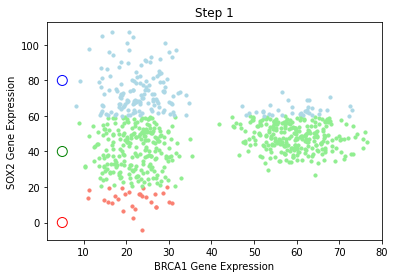

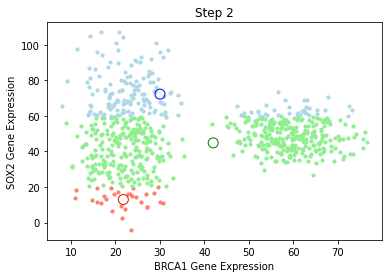

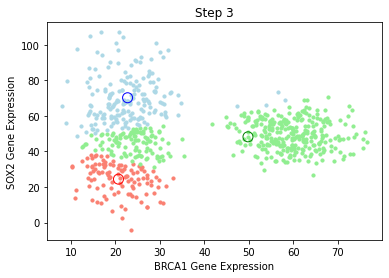

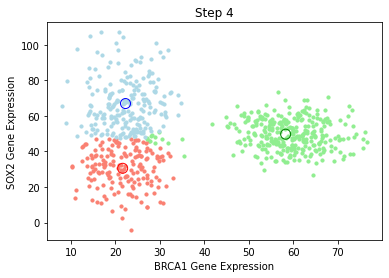

In [6]:
print(np.array(tissue_data["tissue1_data.txt"]).shape)
run_kmeans(tissue_data["tissue1_data.txt"])

C) Now run your code on `tissue2` (your algorithm should converge in six steps this time). What went wrong? What strategy would you employ to find the settings of the algorithm so that it identifies the most obvious clusters, assuming you couldn't see the clusters ahead of time?

**Answer:**

One of the obvious cluster was not discovered by the algorithm. Perhaps randomazing the intial cluster position, and picking the most frequently converged solution would work.  

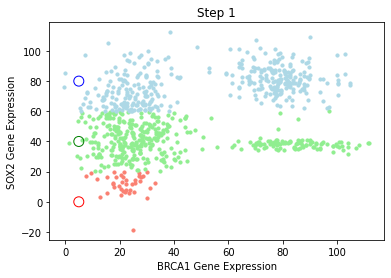

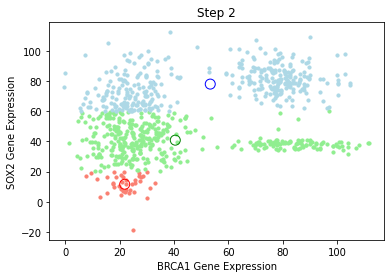

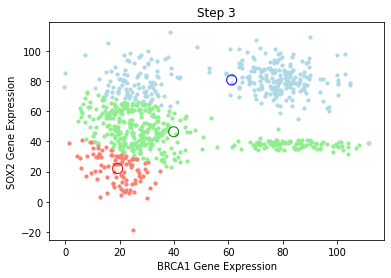

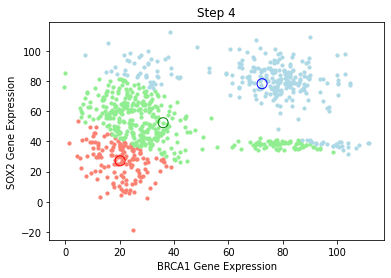

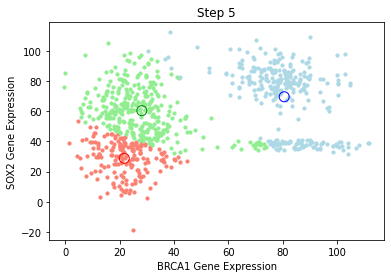

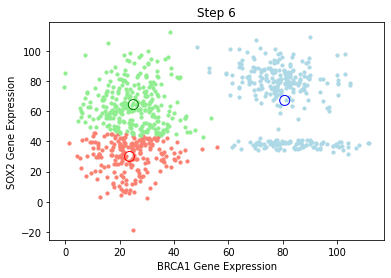

In [ ]:
run_kmeans(tissue_data["tissue2_data.txt"])

**Answer here:**

D) Experiment with the code in `run_kmeans` to try different approaches. Once you are satisfied with your solution, describe how your solution addressed the original problem using some of the output plots for reference.

**Answer:**

I set the intial position of centers closer to the cluster, and as seen in step 3 of the following plot, the previously undiscovered cluster is found. 

In [ ]:
def run_kmeans(dataTable):
    """initializes centroids, stop criterion and step counting for clustering"""
    newCtrs = [[30, 30], [80, 80], [80, 30]]
    ptMemb = assignPoints(dataTable, newCtrs)
    stopCrit = False
    stepCount = 0

    """performs k-means clustering, plotting the clusters at each step"""
    while not stopCrit:
        stepCount += 1

        plotClusters(dataTable, ptMemb, newCtrs, stepCount)

        ### YOUR CODE HERE ###
        oldCtrs=newCtrs
        ptMemb = assignPoints(dataTable, oldCtrs)
        newCtrs=recalculateCtrs(dataTable, oldCtrs, ptMemb)

        """stop criterion - when centroids' total movement after a step is below
            the threshold, stop the algorithm"""
        stopDist = 0;
        for i in range(len(newCtrs)):
            stopDist += np.linalg.norm(np.array(oldCtrs[i]) - np.array(newCtrs[i]))
        if stopDist < 5:
            stopCrit = True
def plotClusters(tbl, ptMemb, cntrs, stepCnt):
    """Generate a scatterplot of the current k-means cluster assignments"""

    pt_colors = ["salmon", "lightgreen", "lightblue"]
    ctr_colors = ["red", "green", "blue"]
    for i in range(len(cntrs)):
        pts = [tbl[j] for j in range(len(tbl)) if ptMemb[j] == i]
        plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts], color = pt_colors[i], s = 10)
        plt.scatter([cntrs[i][0]], [cntrs[i][1]], color = ctr_colors[i], s = 100, facecolors = "none")
    plt.title("Step " + str(stepCnt))
    plt.xlabel("BRCA1 Gene Expression")
    plt.ylabel("SOX2 Gene Expression")
    plt.show()

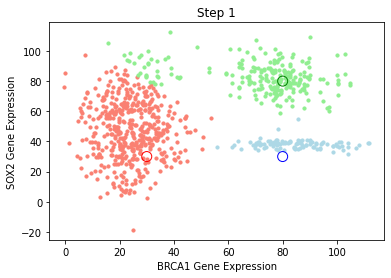

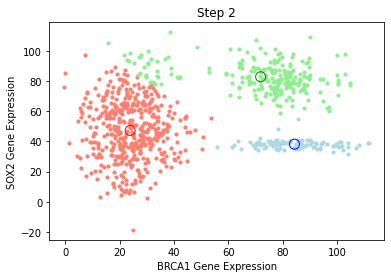

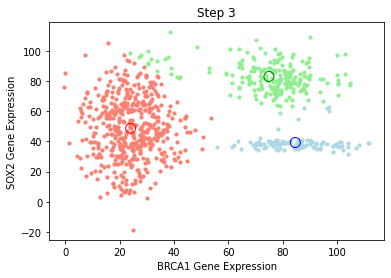

In [ ]:
run_kmeans(tissue_data["tissue2_data.txt"])

**Answer here:**

I set the intial position of centers closer to the cluster, and as seen in step 3 of the above plot, the previously undiscovered cluster is found. 

E) Describe how you would implement fuzzy k-means clustering using the above set of functions. Don't worry about implementing the fuzzy k-means or generating any more plots.

**Answer here:**

We can implement fuzzy k-means clustering by assigning each point $x_i$ to all the centers weighted by distance , and updating the center $u_k$ to weighted mean of points assigned to it. 

#(6.878 only) Hidden Markov Model classification of CpG islands

In this problem, we will implement the eight-state Hidden Markov Model described in lecture to annotate regions as CpG islands, or regions with high CpG dinucleotide frequency. Recall the model has states $A^+$, $C^+$, $G^+$, $T^+$ which emit nucleotides within CpG islands and states $A^-$, $C^-$, $G^-$, $T^-$ which emit nucleotides outside CpG islands.

A) Use the following code blocks to implement the eight-state Hidden Markov Model. It may be helpful to reference or use code from the previous PSET in your implementation.

The training data is the sequence of human chromosome 21 and an existing CpG island annotation which we will use as ground truth. Train the model by computing the maximum likelihood estimates of the model parameters (recall these are relative frequencies). Please also provide:

1. Description of how you handle zeroes in the estimated parameters. (Hint: you may need to do some smoothing in the emission probability matrix to avoid calculating $\log(0)$)
2. The initial state distribution and justification for how it was chosen.
3. The final transition probability matrix.
4. The final emission probability matrix.



The chr21 training data and CpG island annotation are linked here:

ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/chr21.fa.gz
ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/cpgIslandExt.txt.gz

The schema for the CpG island annotation is linked here:

ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/cpgIslandExt.sql

Note that you will only need columns 2 - 4 ("chrom", "chromStart", "chromEnd").

In [ ]:
cpg_hmm_train = files.upload()
for k, v in cpg_hmm_train.items():
    ### YOUR CODE HERE ###

4

**Answer here:**
1. 
2. 
3. 
4. 

B) Use the Viterbi algorithm to annotate CpG islands in the region surrounding the SRY (sex determining region Y)-box 10 gene (SOX10). We are interested in the region between positions 38,000,000 - 39,000,000 of human chromosome 22. Return a list of lists corresponding to the CpG annotations (e.g. `[[1, 1000], [10000, 20000]]`).

The chr22 testing data is linked here:

ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/chr22.fa.gz

In [ ]:
cpg_hmm_test = files.upload()
for k, v in cpg_hmm_test.items():
    ### YOUR CODE HERE ###

C) Evaluate the performance of the model by computing its false positive and false negative rates on the test data against the ground truth annotation. Define a true positive to be a predicted CpG island of which at least 50% overlaps a true CpG island.

Are these two rates equal? If not, what causes this bias?

In [ ]:
A=[1,2,3]
print(sum(A))

6


**Answer here:**

D) Could we improve the performance of the model by tuning parameters? If so, describe how you would do so (you do not have to implement your suggestions). If not, describe and justify some modifications to the model which could reduce its error rate.

**Answer here:**

E) One change to your model that you might consider is to add more states to it. Nevertheless, the number of states will still be finite. Explain why this limits the model's ability to capture phenomena that span arbitrarily large sequences.

**Answer here:**

F) One alternative approach to improve the quality of annotations is combining multiple lines of evidence. Describe and justify some biological criteria for filtering the output of a sequence-based CpG island classifier to improve its performance.

**Answer here:**